# Data Description

In [81]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [82]:
#Loading the dataset
df=pd.read_csv("TitanicSurvival.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.shape

(891, 12)

In [84]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name ,Sex,Ticket, Cabin and Embarked are Object Values

In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
#Checking the null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

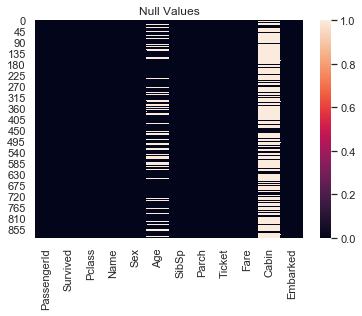

In [87]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We see that Age, Cabin and Embarked as some Null Values

As in Cabin column about 1\3rd of the values are missing.So we get rid of this column.

As Embarked null values are only 2 which is very less compared to whole dataset so we will ignore that 

In [88]:
# Name, Ticket, PassengerId and Cabin are not required to predict the survival so we drop these columns
df1=df.drop(['Ticket','Cabin','Name','PassengerId'],axis=1)

In [89]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Preliminary exploration of survival rate

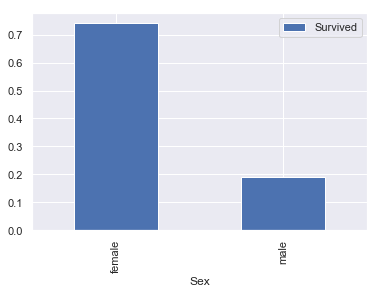

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = df1.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()



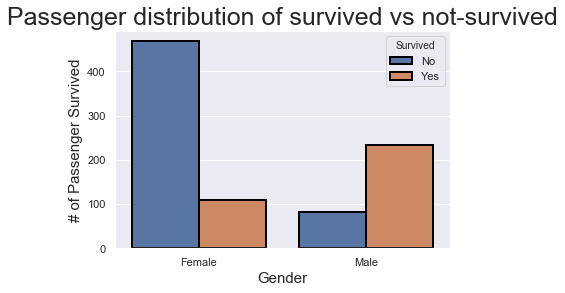

In [91]:
sns.set(style='darkgrid')
plt.subplots()
ax=sns.countplot(x='Sex',data=df1,hue='Survived',edgecolor=(0,0,0),linewidth=2)
df1.shape
## Fixing title, xlabel and ylabeldf
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(df1.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

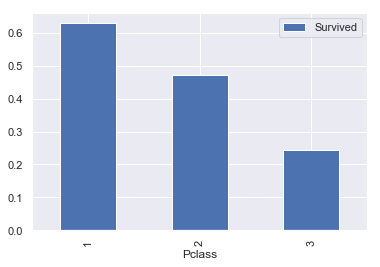

In [92]:
pclass_pivot = df1.pivot_table(index = 'Pclass', values = 'Survived')
pclass_pivot.plot.bar()
plt.show()

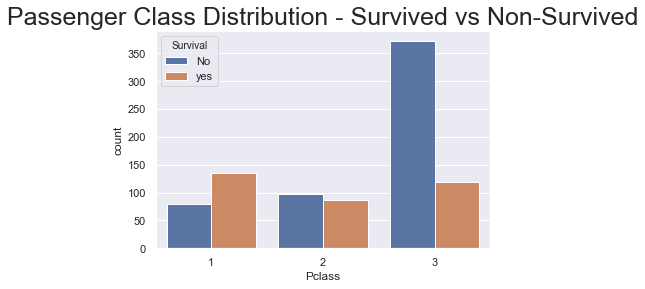

In [93]:
plt.subplots()
ax=sns.countplot(x='Pclass',hue='Survived',data=df1)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

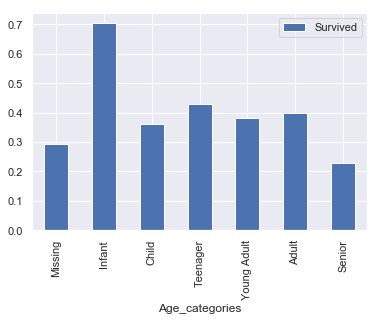

In [94]:
def process_age(df,cut_points,label_names):
    df1["Age"] = df1["Age"].fillna(-0.5)
    df1["Age_categories"] = pd.cut(df1["Age"],cut_points,labels=label_names)
    return df1

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

df1 = process_age(df1,cut_points,label_names)

pivot = df1.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

Infants are the ones which are most likely to survive

In [95]:
df1=df1.drop("Age_categories",axis=1)

In [96]:
# Rectifying Age Null Values by replcaing the missing value with mean value
df1["Age"]=df1["Age"].fillna(np.mean(df1["Age"]))


In [97]:
 
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])



We see that Embarked column also has some null values, which needs to be taken care of. As only 2 values are ther and of object type, so it is better to eradicate the row itself

In [98]:
df1["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [99]:
df1.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)


In [100]:
df1["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [101]:
#Encoding for Embarked Column also
le=LabelEncoder()
df1['Embarked'] = le.fit_transform(df1['Embarked'])

In [102]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [103]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,23.640799,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,17.697943,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [104]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,0.007302,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.357373,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.028838,-0.116348,-0.247508,-0.179958,0.110320
Age,0.007302,-0.357373,0.028838,1.000000,-0.182478,-0.045584,0.132940,0.082566
SibSp,-0.034040,0.081656,-0.116348,-0.182478,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.045584,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.132940,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,0.082566,0.068900,0.040449,-0.226311,1.000000


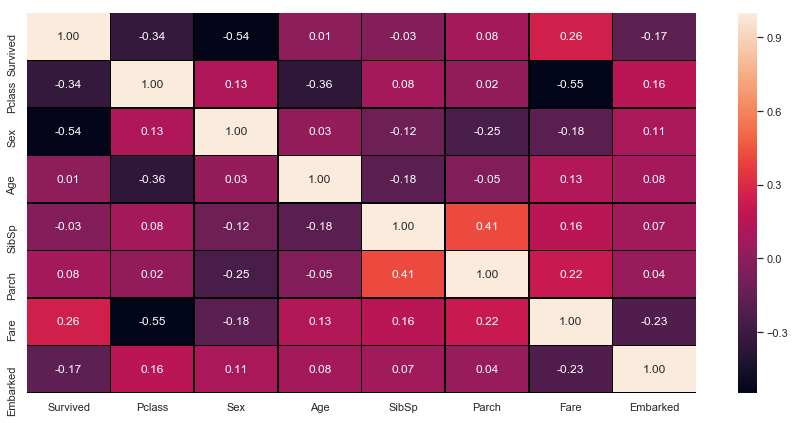

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

([<matplotlib.axis.XTick at 0x2dc7f522cf8>,
 <a list of 3 Text xticklabel objects>)

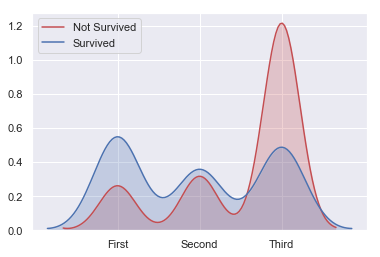

In [106]:
plt.subplots()
sns.kdeplot(df1.loc[(df1['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df1.loc[(df1['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df1.Pclass.unique()),labels)

First class passenger had the upper hand during the tragedy than second and third class passengers.

Text(0.5, 0, 'Fare')

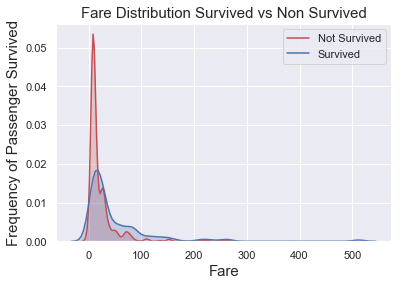

In [107]:
plt.subplots()

ax=sns.kdeplot(df1.loc[(df1['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df1.loc[(df1['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=15)
plt.ylabel('Frequency of Passenger Survived',fontsize=15)
plt.xlabel('Fare',fontsize=15)

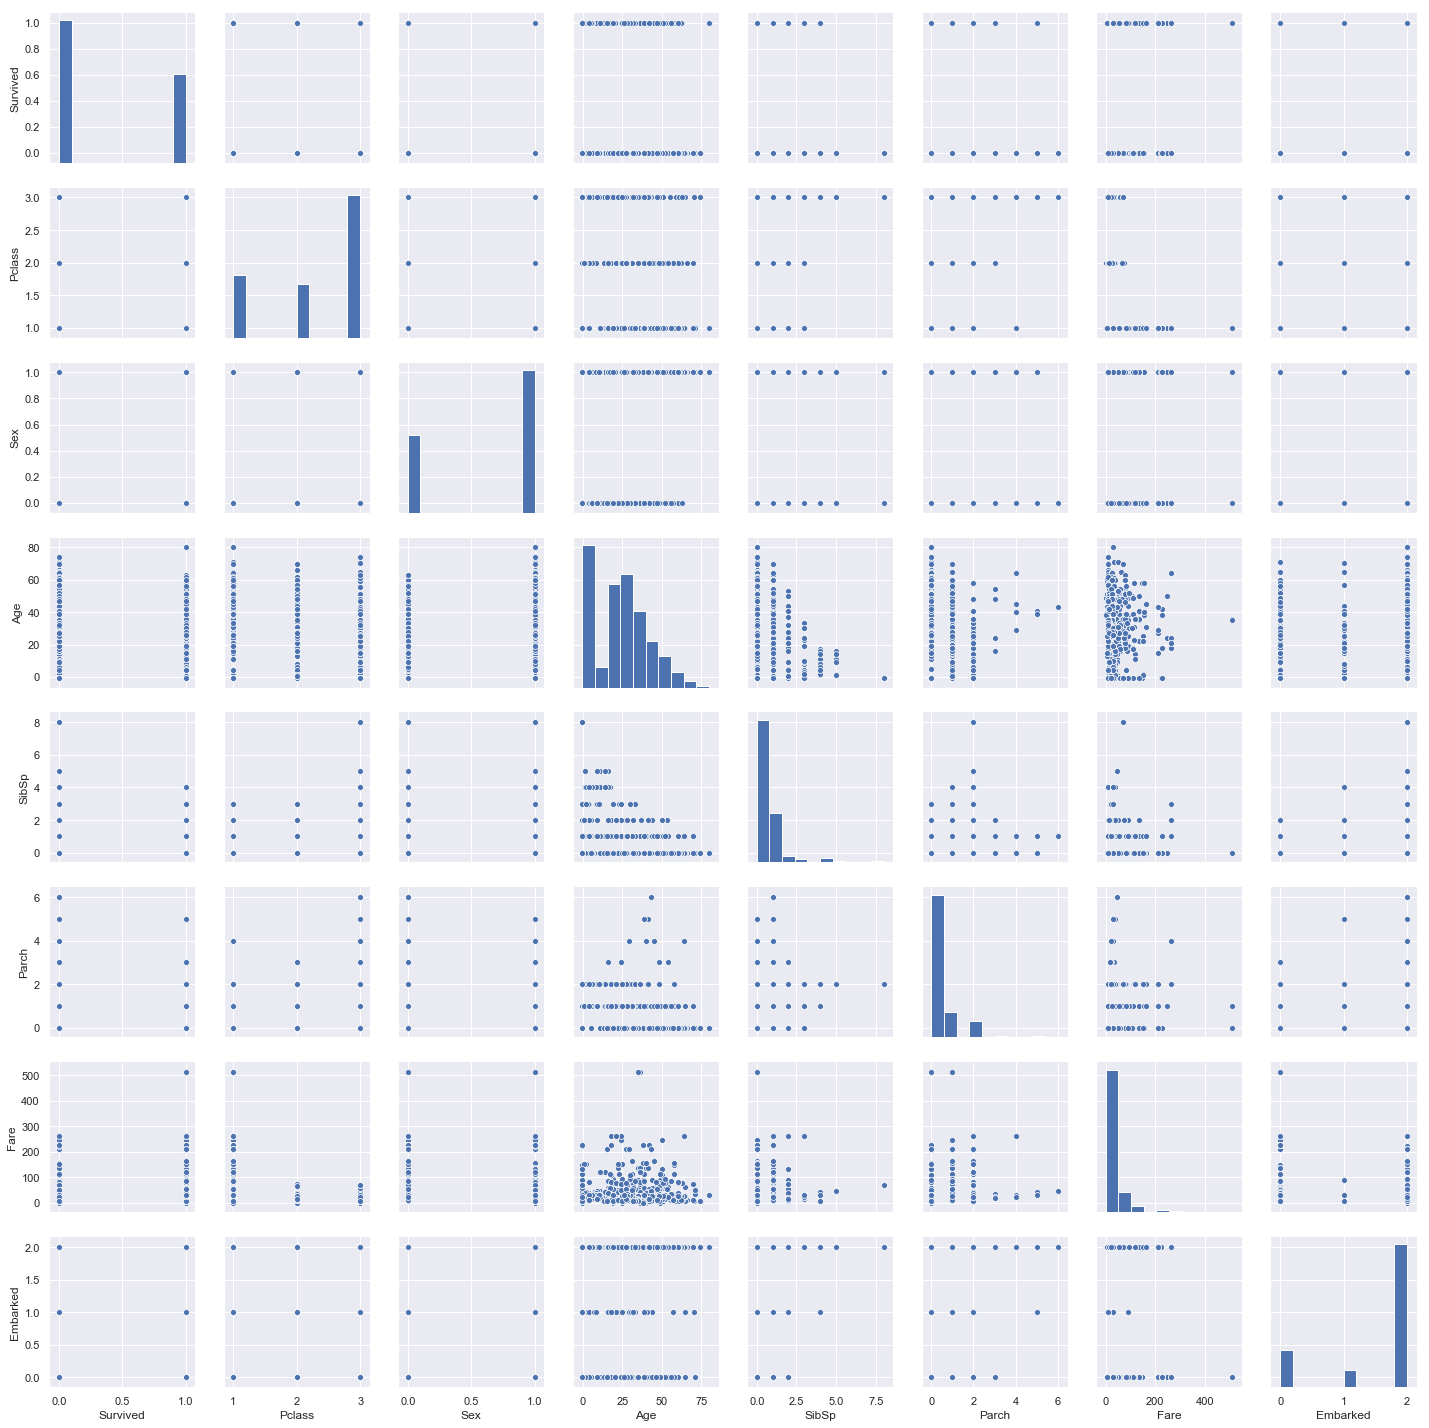

In [108]:
sns.pairplot(df1)

In [109]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]

Pclass         AxesSubplot(0.125,0.125;0.0945122x0.755)
Sex         AxesSubplot(0.238415,0.125;0.0945122x0.755)
Age         AxesSubplot(0.351829,0.125;0.0945122x0.755)
SibSp       AxesSubplot(0.465244,0.125;0.0945122x0.755)
Parch       AxesSubplot(0.578659,0.125;0.0945122x0.755)
Fare        AxesSubplot(0.692073,0.125;0.0945122x0.755)
Embarked    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

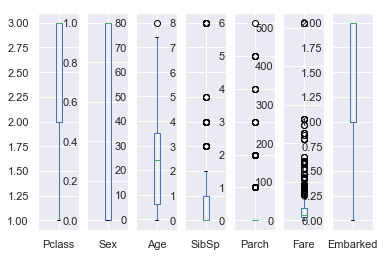

In [110]:
x.plot(kind='box',subplots=True)

# Finding Best Random State

In [111]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8651685393258427 on Random_State 24


# Creating Train Test Split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=24)

# Running Different Algorithms

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

Running all the models and checking their accuracy and cross validation score. The model with least difference between Cross Validation and Accuracy Score is our best model

In [114]:

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))

Accuracy score: of LogisticRegression()
0.8651685393258427
[[109   7]
 [ 17  45]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       116
           1       0.87      0.73      0.79        62

    accuracy                           0.87       178
   macro avg       0.87      0.83      0.85       178
weighted avg       0.87      0.87      0.86       178

Cross Validation Score: 0.7863137180219641
Difference Between Accuracy Score and CrossValidation Score: 0.07885482130387855
Accuracy score: of SVC()
0.6573033707865169
[[102  14]
 [ 47  15]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       116
           1       0.52      0.24      0.33        62

    accuracy                           0.66       178
   macro avg       0.60      0.56      0.55       178
weighted avg       0.63      0.66      0.62       178

Cross Validation Score: 0.6749317590300261
Difference Between Accuracy Sc

As Difference Between Accuracy Score and CrossValidation Score is least for knn classifier, therefore it is our best model

# Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

grid_knn = GridSearchCV(knn, param_grid = hyperparameters, cv = 5)
grid_knn.fit(x,y)

best_params = grid_knn.best_params_
best_score = grid_knn.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.7412746778391418


In [116]:
knn1=KNeighborsClassifier(algorithm ='brute', n_neighbors= 15, p= 1, weights= 'distance')
knn1.fit(x_train,y_train)
predknn1=knn1.predict(x_test)
print('Accuracy score: of',knn1)
acc=accuracy_score(y_test,predknn1)
print(acc)
print(confusion_matrix(y_test,predknn1))
print(classification_report(y_test,predknn1))

Accuracy score: of KNeighborsClassifier(algorithm='brute', n_neighbors=15, p=1, weights='distance')
0.7640449438202247
[[93 23]
 [19 43]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       116
           1       0.65      0.69      0.67        62

    accuracy                           0.76       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.77      0.76      0.77       178



In [117]:
#Saving the Model
import joblib
joblib.dump(knn1,"Titanic_Survival.obj")

['Titanic_Survival.obj']